7594756260024065.0 test


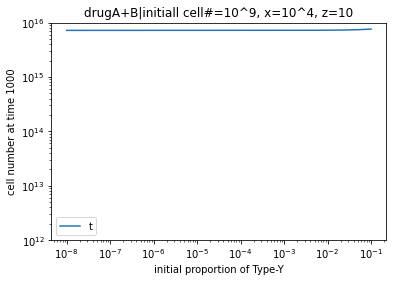

In [1]:
#!/usr/bin/python

import numpy as np 
from scipy.integrate import odeint 
import matplotlib.pyplot as plt 

def dync(x, t, *arg):
    (qzw, pzw, qzx, pzx, qzy, pzy, a, b, c, f, g, h, k, p, q ) = arg
    dw = ((qzw*(x[3]/(x[0]+α)))/(pzw+(x[3]/(x[0]+α)))+a)*x[0] 
    dx = g*x[0] + (((qzx*(x[3]/(x[1]+α)))/(pzx+(x[3]/(x[1]+α))))+b)*x[1]
    dy = h*x[0] + (((qzy*(x[3]/(x[2]+α)))/(pzy+(x[3]/(x[2]+α))))+c)*x[2]
    dz = k*x[0] + p*x[1] + q*x[2] + f*x[3]
    return np.array([dw, dx, dy, dz])

α = 0.00000001  

initial_N = 10**9
t_end = 1000

list_t = np.arange(0, t_end) 

qzw = 0.2
pzw = 0.0009
qzx = 0.025
pzx = 0.0009
qzy = 0.025
pzy = 0.0009

a = -0.064
b = -0.03355
c = -0.03355

f = 0.022
g = 0.0000001 
h = 0.0000001 
k = 0.0000001 
p = 0.0000001 
q = 0.0000001

paramsC = (qzw, pzw, qzx, pzx, qzx, pzy, a, b, c, f, g, h, k, p, q )

fig = plt.figure()
ax = fig.add_subplot(111)
finalnumber = list()
yprop = list()
for y in np.arange(10, 100000000, 10000):
    yprop.append(y/initial_N)
    list_t = np.arange(0, t_end, 0.01)
    cell_init = (initial_N - y - 10**4 - 10, 10**4, y, 10)
    cells = odeint(dync, cell_init, list_t, args = paramsC)
    celltotal = cells[:, 0] + cells[:, 1] + cells[:, 2] + cells[:, 3]
    finalnumber.append(celltotal[-1])
ax.plot(yprop, finalnumber)
lastone = finalnumber[-1]

ax.legend('total cell number')

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim(10**12, 10**16)
ax.set_xlabel('initial proportion of Type-Y')
ax.set_ylabel('cell number at time 1000') 
ax.set_title('drugA+B|initiall cell#=10^9, x=10^4, z=10')

print (lastone, 'test')
plt.show()